<div align="center"><b>Московский государственный технический университет им. Н.Э. Баумана</b></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div align="center">Факультет «Информатика и системы управления»</div>
<div align="center">Кафедра ИУ5 «Системы обработки информации и управления»</div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div align="center">Курс «Технологии машинного обучения»</div>
<div><br/></div>
<div align="center">Отчет по лабораторной работе №1</div>
<div align="center">«Разведочный анализ данных. Исследование и визуализация данных»</div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>
Выполнил:	студент группы ИУ5-53

Миронова Александра

Подпись и дата: 09.03.22

Проверил: Юрий Евгеньевич Гапанюк  

Подпись и дата:

<div><br/></div>
<div><br/></div>
<div><br/></div>
<div><br/></div>

<div align="center">Москва, 2022 г.</div>


## <h1> Лабораторная работа №1 </h1>

**Задание:**

1)Выбрать набор данных (датасет)

2)Создать ноутбук, который содержит следующие разделы:

<ul>
    <li>Текстовое описание выбранного Вами набора данных.</li>
    <li>Основные характеристики датасета.</li>
    <li>Визуальное исследование датасета.</li>
    <li>Информация о корреляции признаков.</li>
</ul>

## 1) Текстовое описание набора данных

В качестве набора данных я буду использовать набор данных о книгах бестлеллерах интернет-магазина амазон жанров фантастика и научная фантастика - https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

Мне стало интересно, какие книги выходят в бестселлеры и какие факторы влияют на возможность выхода книги в список бестселлеров.

Датасет состоит из файла: bestsellers_with_categories.csv

Файл содержит следующие колонки:
<ul>
    <li>Name  -  название книги</li>
    <li>Author  -  Автор книги</li>
    <li>User rating  -  рейтинг книги</li>
    <li>Reviews  -  количество отзывов о книге</li>
    <li>Price  -  цена книги</li>
    <li>Year  -  год получения статуса бестселлер</li>
    <li>Genre  -  жанр</li>
</ul>

## 2) Основные характеристики датасета



In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('bestsellers_with_categories.csv', sep=",")
# Первые 5 строк датасета
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [9]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 550


In [4]:
# Список колонок
data.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [5]:
# Список колонок с типами данных
data.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [6]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
print('Видим, что пустых значений в датасете нет')

Name - 0
Author - 0
User Rating - 0
Reviews - 0
Price - 0
Year - 0
Genre - 0
Видим, что пустых значений в датасете нет


In [7]:
# Основные статистические характеристки набора данных
data.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


## 3) Визуальное исследование датасета.



**"Парные диаграммы"**

Для начала построим комбинации гистограмм и диаграмм рассеивания для всего набора данных. Это поможет найти графики, зависимости которых могут быть интересны для дальнейшего исследования.

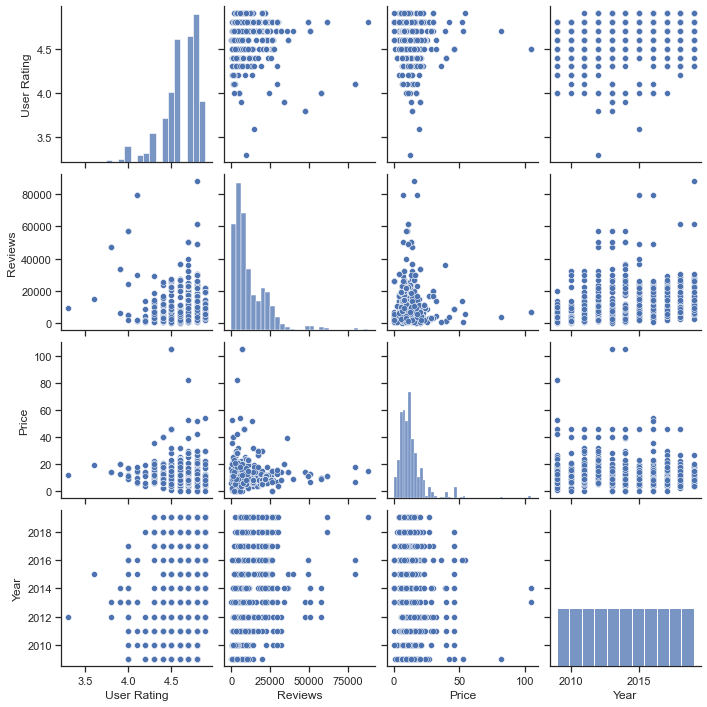

In [10]:
sns.pairplot(data)

Буду считать поле User Rating целевым признаком, тк он является основным показателем при выборе книги и выходе ее в с татус бестселлера. Посмотрим на влияние целевого признака.

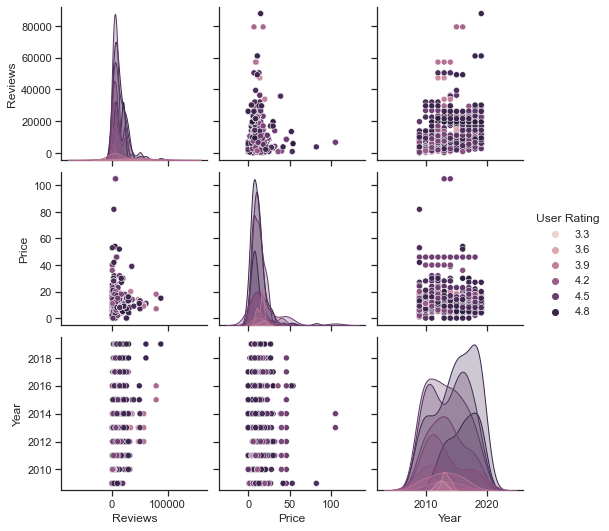

In [11]:
sns.pairplot(data, hue="User Rating")

**Линейный график**

Зависимость количества отзывов книг от их рейтинга

<AxesSubplot:xlabel='User Rating', ylabel='Reviews'>

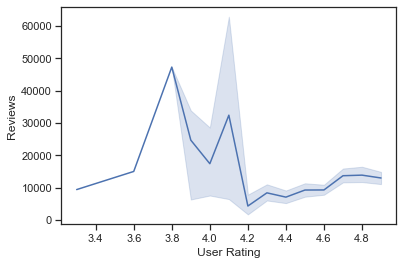

In [14]:
sns.lineplot(data=data, x="User Rating", y="Reviews")

**Столбчатая диаграмма**

Рассмотрим зависимость средней цены книги по значению рейтинга

                  Reviews      Price         Year
User Rating                                      
3.3           9372.000000  12.000000  2012.000000
3.6          14982.000000  19.000000  2015.000000
3.8          47265.000000  14.000000  2012.500000
3.9          24666.000000  17.666667  2013.333333
4.0          17376.142857  14.642857  2012.928571
4.1          32384.166667  11.666667  2013.000000
4.2           4283.500000  11.625000  2011.250000
4.3           8362.880000  13.280000  2013.680000
4.4           7038.973684  14.447368  2012.815789
4.5           9231.116667  20.933333  2013.416667
4.6           9260.038095  12.095238  2013.314286
4.7          13660.925926  12.990741  2013.833333
4.8          13840.110236  10.866142  2014.929134
4.9          12957.423077  10.288462  2016.096154


<AxesSubplot:xlabel='User Rating', ylabel='Price'>

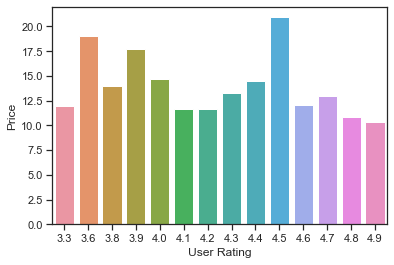

In [19]:
MeanPprice = data.groupby(['User Rating']).mean()
print(MeanPprice)
sns.barplot( data=MeanPprice, x=MeanPprice.index, y=MeanPprice["Price"])

**Гистограмма по видам**

Построим гистограмму, демонстрирующую, какое количество книг каждого жанра вошло в список бестселлеров в каждом году

      Name  Author  User Rating  Reviews  Price  Genre
Year                                                  
2009    26      26           26       26     26     26
2010    30      30           30       30     30     30
2011    29      29           29       29     29     29
2012    29      29           29       29     29     29
2013    26      26           26       26     26     26
2014    21      21           21       21     21     21
2015    33      33           33       33     33     33
2016    31      31           31       31     31     31
2017    26      26           26       26     26     26
2018    29      29           29       29     29     29
2019    30      30           30       30     30     30


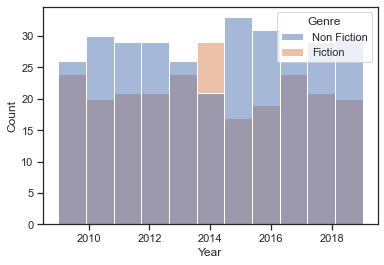

In [23]:
sns.histplot(data=data, x="Year", hue="Genre")
pdn = data[data['Genre'].isin(['Non Fiction'])]
pdf = data[data['Genre'].isin(['Fiction'])]
print(pdn.groupby('Year').count())

## 4) Информация о корреляции признаков

In [21]:
data.corr()

,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


На основе корреляционной матрицы можно сделать следующие выводы:

Наиболее сильно кореллируют между собой нецелевые признаки Reviews и Year(0,26)

Наиболее сильно кореллирует с целевым признаком User Rating нецелевой признак Year(0,24)

Однако во всей матрице корелляций все коэффициенты корелляции достаточно малы, из чего можно сделать вывод, что все признаки слабо коррелируют с целевым признаком, выбранный датасет плохо бы подошел для моделей машинного обучения.

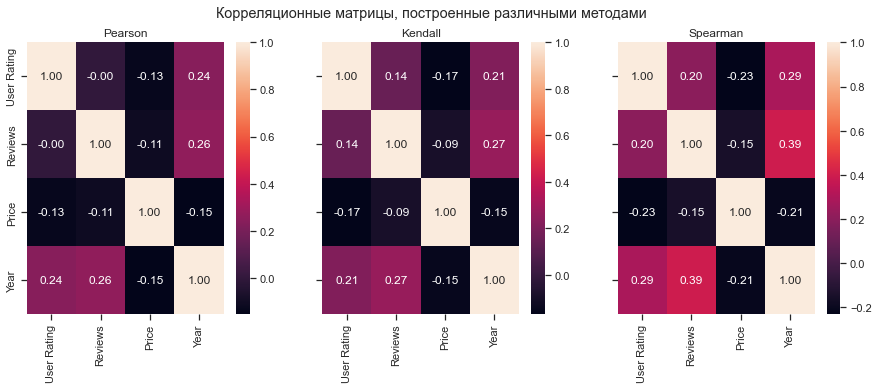

In [22]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')